 Name Abhinav Kumar Singh

Task- Prediction using Supervised ML

(Level - Beginner)
Description - Implementing linear regression to predict score of a student who studies 9.25hrs/day

In [3]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Reading the dataset
df=pd.read_csv("student_scores - student_scores.csv")

In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


[Text(0, 0.5, 'Scores'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Relation between')]

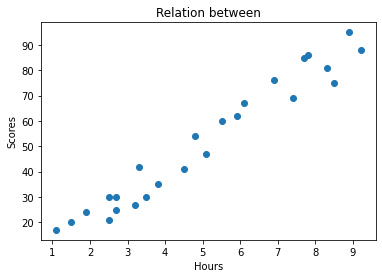

In [7]:
#Ploting graph
fig,ax=plt.subplots()
ax.scatter(df["Hours"],df["Scores"])
ax.set(title="Relation between",xlabel="Hours",ylabel="Scores")

# Separating our independant and dependent variable

In [8]:
x=df.drop("Scores",axis=1)

In [9]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [10]:
y=df["Scores"]

In [11]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [12]:
#Splitting data into training and test dataset
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [14]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [15]:
x_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [16]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)

In [19]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [20]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [21]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [22]:
#Evaluating model
from sklearn.metrics import r2_score,mean_absolute_error
print("The R2 score is")
print(r2_score(y_test,y_pred))
print("The mean absolute error is")
print(mean_absolute_error(y_test,y_pred))

The R2 score is
0.9678055545167993
The mean absolute error is
3.920751190209927


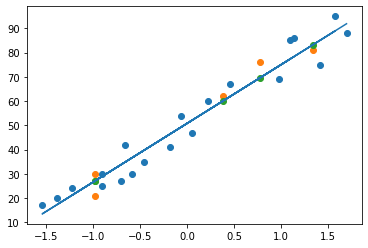

In [27]:
# Plotting the regression line
line = lr.coef_*x_train+lr.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)#blue points
plt.scatter(x_test,y_test)#orange points
plt.scatter(x_test,y_pred)#green points
plt.plot(x_train, line)#blue line
plt.show()

# Predicting the score 

In [57]:
hour=9.25
df2=pd.Series([hour])

In [58]:
df2

0    9.25
dtype: float64

In [62]:
s=sc.transform([df2])

In [63]:
s

array([[1.71471102]])

In [64]:
score=lr.predict(s)

In [65]:
score

array([92.38611528])

# 2nd Way

In [71]:
h=[[9.25]]

In [77]:
s1=sc.transform(h)

In [78]:
score1= lr.predict(s1)

In [79]:
score1

array([92.38611528])

In [83]:
print("If a student studies for 9.25hrs/day he may score")
print(float(score1))

If a student studies for 9.25hrs/day he may score
92.38611528261494
